In [1]:
import scipy.io
import numpy as np
from utils import load_files, get_rdms, get_rdm, get_spearmanr, inter_intra_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import imageio
import torch
%load_ext autoreload
%autoreload 2

In [2]:
%store -r d_all
%store -r avg
%store -r df

In [3]:
# Get all used models in list
l = []
for k1 in avg.keys():
    for k2 in d_all[k1].keys():
        l.append(k2)

In [4]:
# Check how often they were used to later define cut-off
d2 = {}
for item in l:
    if item in d2:
        d2[item] +=1
    else:
        d2[item] = 1

In [5]:
# Cut-off is 2 here
df2 = pd.Series(d2)
df2 = df2[df2 >= 2]
df2.sort_values(ascending=False)
l = list(df2.index)

In [6]:
drop = list(df.index)
drop = [i for i in drop if i not in l]

In [7]:
df_only_most_rel = df.drop(labels=drop, axis=1)
df_only_most_rel = df_only_most_rel.drop(labels=drop, axis=0)

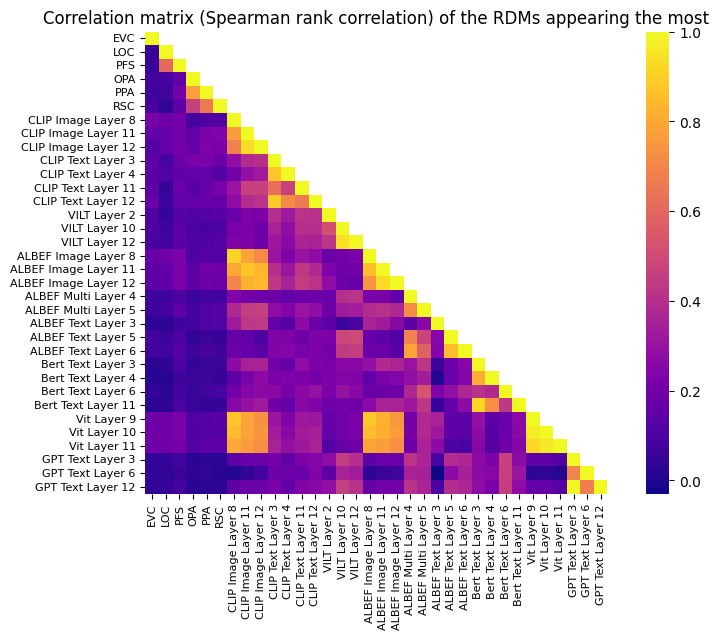

In [8]:
mask = np.triu(np.ones_like(df_only_most_rel, dtype=bool), k=1)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_only_most_rel, mask=mask, square=True, cmap='plasma', yticklabels=True, xticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_title('Correlation matrix (Spearman rank correlation) of the RDMs appearing the most')
plt.show()

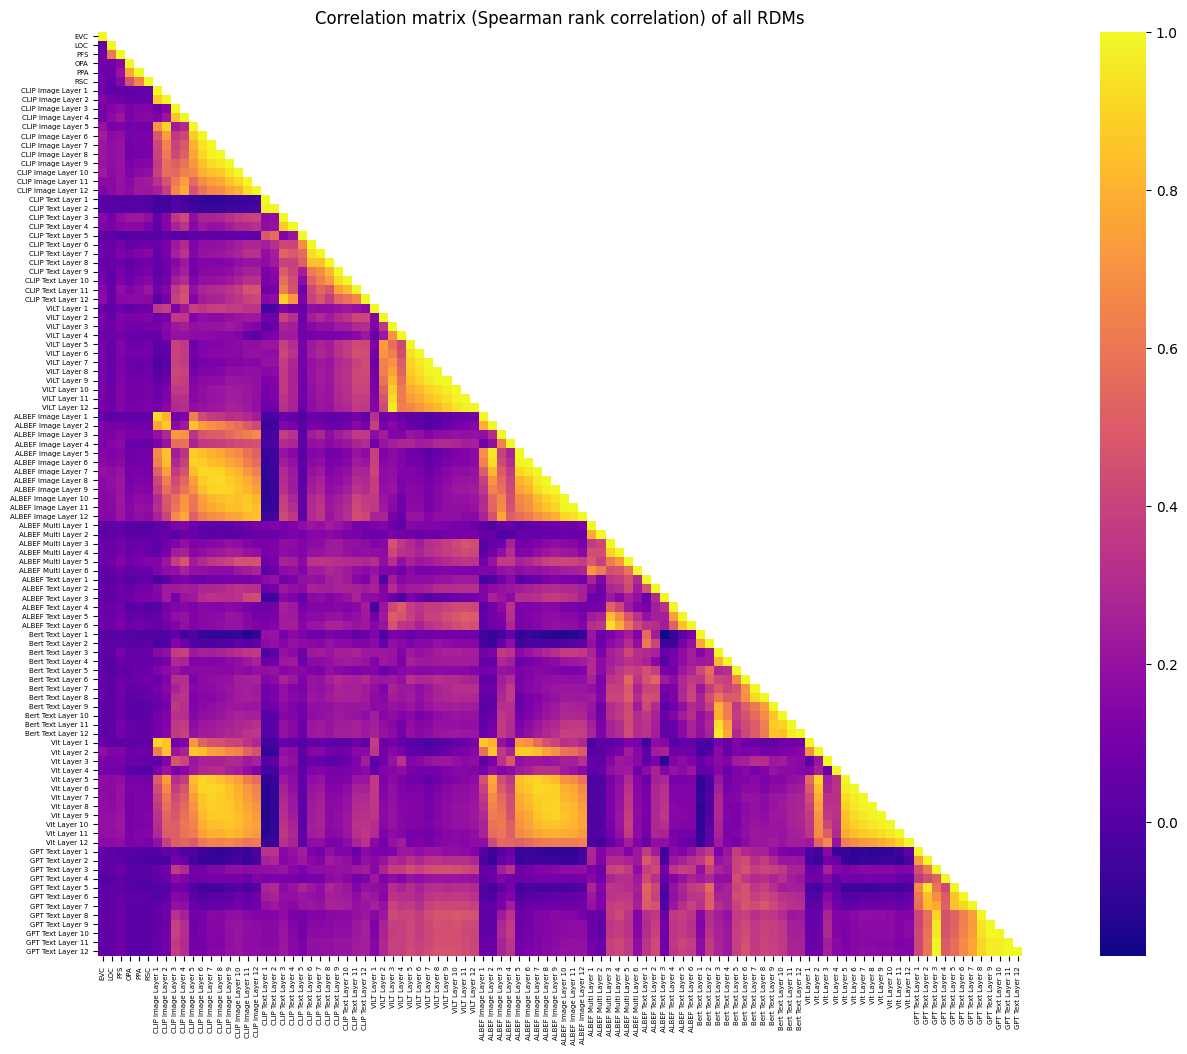

In [9]:
mask = np.triu(np.ones_like(df, dtype=bool), k=1)

plt.figure(figsize=(20, 12))
ax = sns.heatmap(df, mask=mask, square=True, cmap='plasma', yticklabels=True, xticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
ax.set_title('Correlation matrix (Spearman rank correlation) of all RDMs')
plt.show()

In [10]:
%store df_only_most_rel

Stored 'df_only_most_rel' (DataFrame)
